# [빅데이터 처리1] - 5월 6일

In [4]:
import pandas as pd

In [5]:
pd.read_csv("playtennis.csv")   #playtennis.csv 읽어서 dataframe 리턴 

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
#윗내용 변수 담아주기 
tennis_data=pd.read_csv("playtennis.csv")  

In [7]:
tennis_data                                                              

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [8]:
#결과는 문자가 저장되어있는데 Decision TREE는 숫자가 젖아되있어야함;;; 
# 숫자로 바꿔주도록 하지 

In [9]:
### 방법 1

In [10]:
tennis_data.Outlook.replace("Sunny",0)                              #칸이름 (원래값 , 새값 ) 근데 기전 컬럼이 바뀐거 아니고 새로운 컬럼이 만들어짐!! 
                                                                 #기존 outlook은 그대로 있음. 

0            0
1            0
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7            0
8            0
9         Rain
10           0
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [11]:
tennis_data.Outlook                                                    #진짜 그대로있네;;

0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [12]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny",0)                        #덮어 씌워서 

In [54]:
import numpy as np
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data),columns = ['playTennis'])

TypeError: 'columns' is an invalid keyword argument for array()

In [13]:
### 방법 2

In [14]:
tennis_data.Outlook.replace("Overcast",1,inplace=True)                    #그냥 고치지 뭘.. 

In [15]:
tennis_data.Outlook

0        0
1        0
2        1
3     Rain
4     Rain
5     Rain
6        1
7        0
8        0
9     Rain
10       0
11       1
12       1
13    Rain
Name: Outlook, dtype: object

In [16]:
tennis_data["Outlook"].replace("Rain",2,inplace=True)

In [17]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [18]:
tennis_data.Temperature.replace("Hot",1,inplace=True)
tennis_data.Temperature.replace("Mild",2,inplace=True)
tennis_data.Temperature.replace("Cool",3,inplace=True)

In [19]:
tennis_data.Humidity.replace("High",1,inplace=True)
tennis_data.Humidity.replace("Normal",2,inplace=True)

In [20]:
tennis_data.Wind.replace("Weak",1,inplace=True)
tennis_data.Wind.replace("Strong",2,inplace=True)

In [21]:
tennis_data.PlayTennis.replace("No",1,inplace=True)
tennis_data.PlayTennis.replace("Yes",2,inplace=True)

In [22]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [23]:
#decision tree만들어주기

In [24]:
tennis_data.loc[ : , "Outlook" : "Wind"]

,Outlook,Temperature,Humidity,Wind
0,0,1,1,1
1,0,1,1,2
2,1,1,1,1
3,2,2,1,1
4,2,3,2,1
5,2,3,2,2
6,1,3,2,2
7,0,2,1,1
8,0,3,2,1
9,2,2,2,1


In [25]:
X = tennis_data.loc[ : , "Outlook" : "Wind"]       #독립변수들로 지정

In [26]:
Y = tennis_data[["PlayTennis"]]                     #종속변수로 column 가져오기

In [27]:
Y                                                

,PlayTennis
0,1
1,1
2,2
3,2
4,2
5,1
6,2
7,1
8,2
9,2


In [28]:
y = tennis_data["PlayTennis"]      

In [29]:
y                                               #시리즈로 나옴 

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_test_split(X,y,test_size=0.2)          #독립변수X 80% -> 독립변수20% ->종속변수y 80%-> 종속변수20% 

[    Outlook  Temperature  Humidity  Wind
 1         0            1         1     2
 10        0            2         2     2
 11        1            2         1     2
 2         1            1         1     1
 4         2            3         2     1
 12        1            1         2     1
 5         2            3         2     2
 9         2            2         2     1
 8         0            3         2     1
 13        2            2         1     2
 6         1            3         2     2,
    Outlook  Temperature  Humidity  Wind
 7        0            2         1     1
 0        0            1         1     1
 3        2            2         1     1,
 1     1
 10    2
 11    2
 2     2
 4     2
 12    2
 5     1
 9     2
 8     2
 13    1
 6     2
 Name: PlayTennis, dtype: int64,
 7    1
 0    1
 3    2
 Name: PlayTennis, dtype: int64]

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dt_clf = DecisionTreeClassifier()   #Decision Tree 만들 객체 생성 .. 그럼 대체 언제만들어줘? fit()

In [36]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
dt_prediction = dt_clf.predict(X_test)

In [38]:
dt_prediction

array([2, 2, 1], dtype=int64)

In [39]:
y_test 

9     2
12    2
11    2
Name: PlayTennis, dtype: int64

In [40]:
#정확도 보기 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,dt_prediction)
print("정확도:",accuracy)

정확도: 0.6666666666666666


### 트리 시각화 p.69 

In [41]:
! pip install pydotplus

In [42]:
! pip install graphviz

In [43]:
from sklearn import tree

In [44]:
dt_dot_data = tree.export_graphviz(
                    dt_clf,
                    feature_names = ["Outlook","Temperature","Humidity","Wind"],
                    class_names = ["No","Yes"]           #주의할것은 
)

In [45]:
dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.496\\nsamples = 11\\nvalue = [5, 6]\\nclass = Yes"] ;\n1 [label="Outlook <= 0.5\\ngini = 0.444\\nsamples = 6\\nvalue = [4, 2]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = No"] ;\n1 -> 2 ;\n3 [label="Wind <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="Outlook <= 1.5\\ngini = 0.32\\nsamples = 5\\nvalue = [1, 4]\\nclass = Yes"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]\\nclass = Yes"] ;\n6 -> 7 ;\n8 [label="Wind <= 1.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\

In [46]:
import pydotplus 

In [47]:
pydotplus.graph_from_dot_data(dt_dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xa4\x00\x00\x02A\x08\x02\x00\x00\x00\x1f\xad0\xcf\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7f|S\xf5\xbd?\xf0\xcf\x81\x96)\xa8\t\x9bk\xf9\xa1\xd5\x89\xb6c\xf3\xae\\\xbc`qN&\xb8\xa1\xc5\x13\x9c\xb6\xa5\xe1!\xd39\xda%W:et\x13\xb9\'\xab\xda\xde\xe1f:\x7f\x806$8\xad\xbd#i\x8b\xbb\xd2 \xec\x07-\xc2c\xd2\x8e\xf9#\x99\xd7a\xab\xa0\x89\x80Kt\x9a\x88 R\xca\xf9\xfe\xf1\xf9rv<\xf9\xd149\xc9\xf9\x91\xd7\xf3\x8f>\x92sN\xcey\xa7\'\xe7\xbc\xcf\xe7s>\xe7\xf3ax\x9e\'\x00\x00\x00\xa0_\xe3\x94\x0e\x00\x00\x00\x00\xb2\x0b\xc9\x1e\x00\x00@\xe7\x90\xec\x01\x00\x00t\xae@\xe9\x00 \x1fuuu)\x1d\x02\x8c\xd9\x85\x17^8o\xde<\xa5\xa3\x00\x80t0h\xa0\x07\xb9\xc70\x8c\xd2!\xc0\x98UUUuww+\x1d\x05\x00\xa4\x03%{PFgggMM\x8d\xd2Q@\xaa\xaa\xab\xab\x95\x0e\x01\x00\xd2\x87{\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\xc4f\xb3\xd9l\xb6\xb8\xb3\xc2

In [48]:
data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()

In [49]:
data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xa4\x00\x00\x02A\x08\x02\x00\x00\x00\x1f\xad0\xcf\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7f|S\xf5\xbd?\xf0\xcf\x81\x96)\xa8\t\x9bk\xf9\xa1\xd5\x89\xb6c\xf3\xae\\\xbc`qN&\xb8\xa1\xc5\x13\x9c\xb6\xa5\xe1!\xd39\xda%W:et\x13\xb9\'\xab\xda\xde\xe1f:\x7f\x806$8\xad\xbd#i\x8b\xbb\xd2 \xec\x07-\xc2c\xd2\x8e\xf9#\x99\xd7a\xab\xa0\x89\x80Kt\x9a\x88 R\xca\xf9\xfe\xf1\xf9rv<\xf9\xd149\xc9\xf9\x91\xd7\xf3\x8f>\x92sN\xcey\xa7\'\xe7\xbc\xcf\xe7s>\xe7\xf3ax\x9e\'\x00\x00\x00\xa0_\xe3\x94\x0e\x00\x00\x00\x00\xb2\x0b\xc9\x1e\x00\x00@\xe7\x90\xec\x01\x00\x00t\xae@\xe9\x00 \x1fuuu)\x1d\x02\x8c\xd9\x85\x17^8o\xde<\xa5\xa3\x00\x80t0h\xa0\x07\xb9\xc70\x8c\xd2!\xc0\x98UUUuww+\x1d\x05\x00\xa4\x03%{PFgggMM\x8d\xd2Q@\xaa\xaa\xab\xab\x95\x0e\x01\x00\xd2\x87{\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\x00\x00:\x87d\x0f\x00\x00\xa0sH\xf6\x00\xc4f\xb3\xd9l\xb6\xb8\xb3\xc2

In [50]:
from io import BytesIO

In [51]:
from PIL import Image

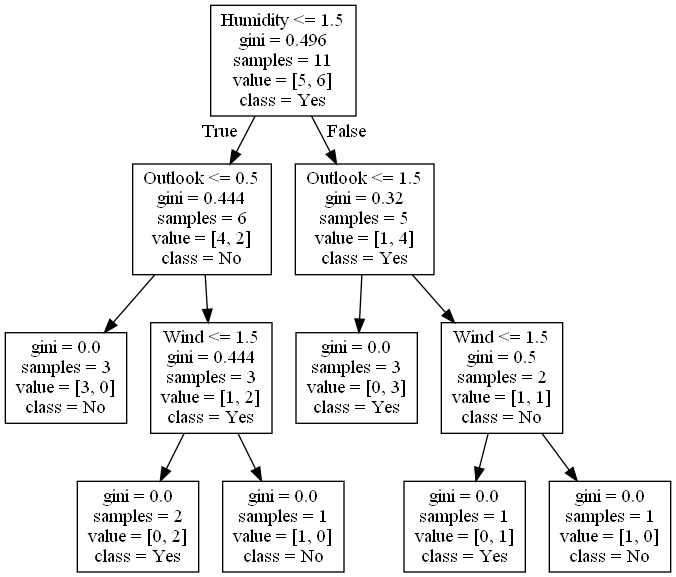

In [52]:
Image.open(BytesIO(data))